## Importing All Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
algorithms = ['LR', 'SVM', 'RF', 'XGB', 'CNN', 'LSTM', 'CNN-LSTM', 'SARIMAX', 'FBProphet']
mse_tts = [176.76, 179.88, 254.34, 282.95, 2417.73, 1863.13, 7682.09, 12919.91, 10493.07]
mse_f80 = [32.13, 290.18, 10885.80, 11862.64, 38259.15, 1984.71, 17683.82, 14843.97, 10493.07]

rmse_tts = [13.10, 13.411, 15.94, 16.82, 49.17, 43.16, 87.64, 113.66, 102.43]
rmse_f80 = [5.66, 17.03, 104.33, 108.91, 195.59, 44.55, 132.95, 121.84, 102.43]

mae_tts = [8.76, 8.89, 9.84, 10.66, 34.01, 24.66, 58.81, 99.69, 86.13]
mae_f80 = [4.17, 12.22, 71.79, 76.59, 150.12, 39.87, 111.23, 104.39, 86.13]

training_time = [0.031, 1.001, 2.255, 1.234, 91.938, 966.430, 135.355, 93.043, 6.603]

In [3]:
df =  pd.DataFrame({'Algorithms': algorithms,
                   'MSE_TTS': mse_tts,
                   'MSE_F80': mse_f80,
                   'RMSE_TTS': rmse_tts,
                   'RMSE_F80': rmse_f80,
                   'MAE_TTS': mae_tts,
                   'MAE_F80': mae_f80,
                   'Training_Time': training_time},
                   columns = ['Algorithms', 'MSE_TTS', 'MSE_F80', 'RMSE_TTS', 'RMSE_F80', 'MAE_TTS', 'MAE_F80', 'Training_Time'])
df

,Algorithms,MSE_TTS,MSE_F80,RMSE_TTS,RMSE_F80,MAE_TTS,MAE_F80,Training_Time
0,LR,176.76,32.13,13.100,5.66,8.76,4.17,0.031
1,SVM,179.88,290.18,13.411,17.03,8.89,12.22,1.001
2,RF,254.34,10885.80,15.940,104.33,9.84,71.79,2.255
3,XGB,282.95,11862.64,16.820,108.91,10.66,76.59,1.234
4,CNN,2417.73,38259.15,49.170,195.59,34.01,150.12,91.938
5,LSTM,1863.13,1984.71,43.160,44.55,24.66,39.87,966.430
6,CNN-LSTM,7682.09,17683.82,87.640,132.95,58.81,111.23,135.355
7,SARIMAX,12919.91,14843.97,113.660,121.84,99.69,104.39,93.043
8,FBProphet,10493.07,10493.07,102.430,102.43,86.13,86.13,6.603


In [4]:
df.set_index('Algorithms', inplace=True)

In [5]:
df

,MSE_TTS,MSE_F80,RMSE_TTS,RMSE_F80,MAE_TTS,MAE_F80,Training_Time
Algorithms,,,,,,,
LR,176.76,32.13,13.100,5.66,8.76,4.17,0.031
SVM,179.88,290.18,13.411,17.03,8.89,12.22,1.001
RF,254.34,10885.80,15.940,104.33,9.84,71.79,2.255
XGB,282.95,11862.64,16.820,108.91,10.66,76.59,1.234
CNN,2417.73,38259.15,49.170,195.59,34.01,150.12,91.938
LSTM,1863.13,1984.71,43.160,44.55,24.66,39.87,966.430
CNN-LSTM,7682.09,17683.82,87.640,132.95,58.81,111.23,135.355
SARIMAX,12919.91,14843.97,113.660,121.84,99.69,104.39,93.043
FBProphet,10493.07,10493.07,102.430,102.43,86.13,86.13,6.603


### Training Time for different machine learning and deep learning algorithms

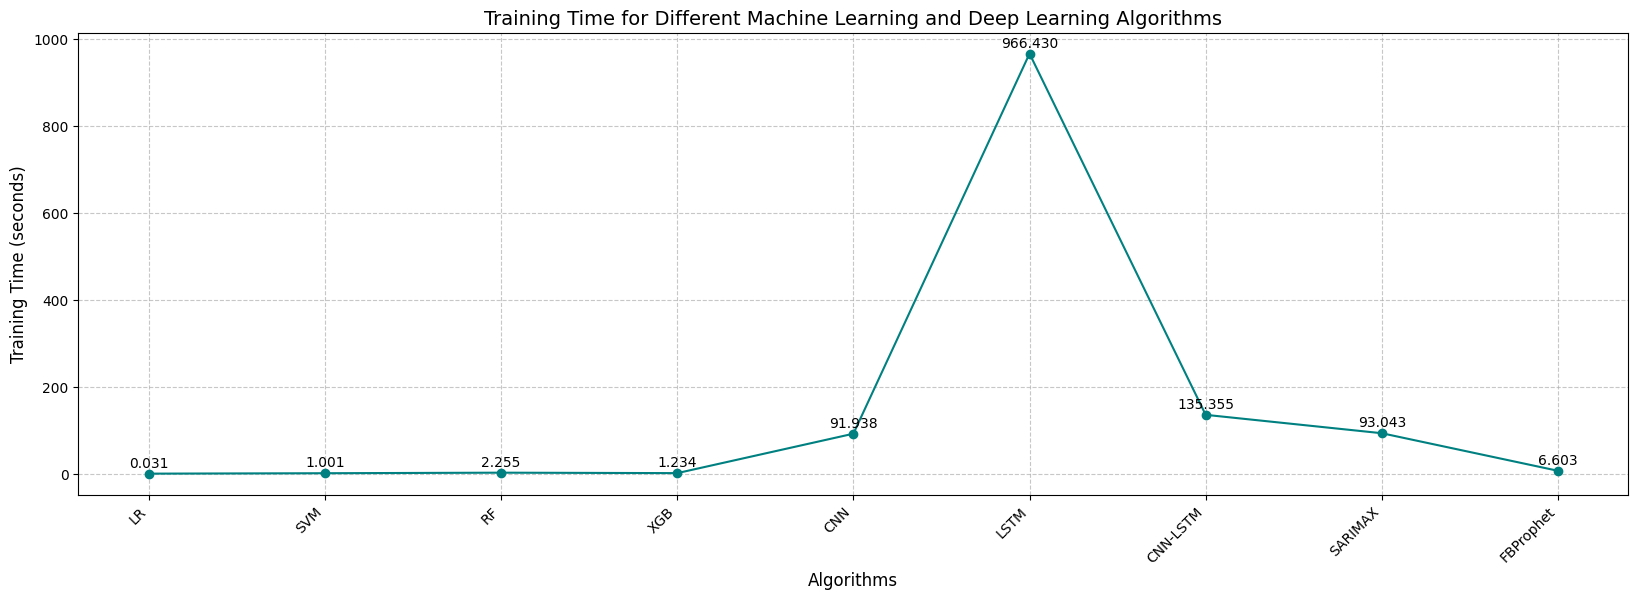

In [6]:
plt.figure(figsize=(20, 6))
plt.plot(df.Training_Time, marker = 'o', color = 'teal', linestyle='-', label='Training Time')

for i, time in enumerate(df.Training_Time):
    plt.text(i, time + 15, f'{time:.3f}', ha='center', fontsize=10)  # Adjust `+1` for spacing

plt.xticks(rotation=45)
plt.title('Training Time for Different Machine Learning and Deep Learning Algorithms', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.xlabel('Algorithms', fontsize=12)
plt.ylabel('Training Time (seconds)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

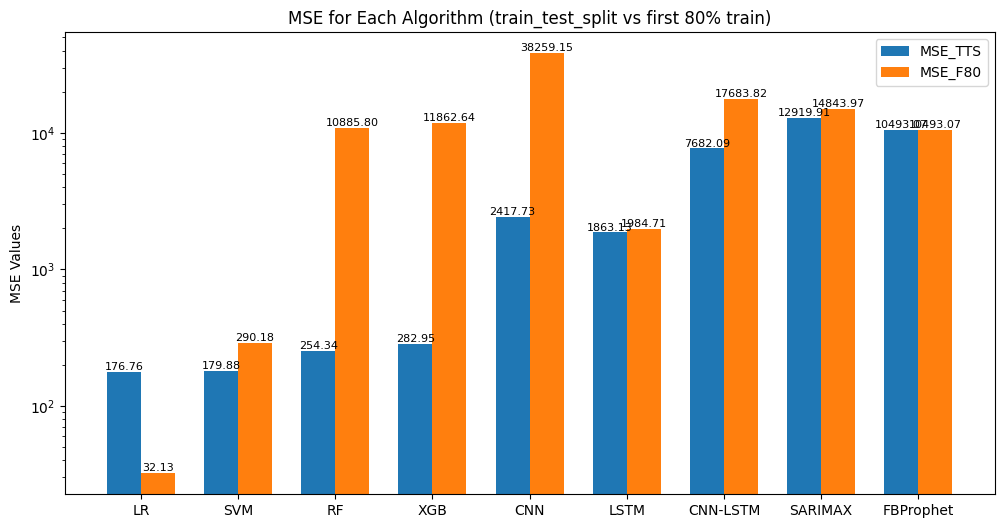

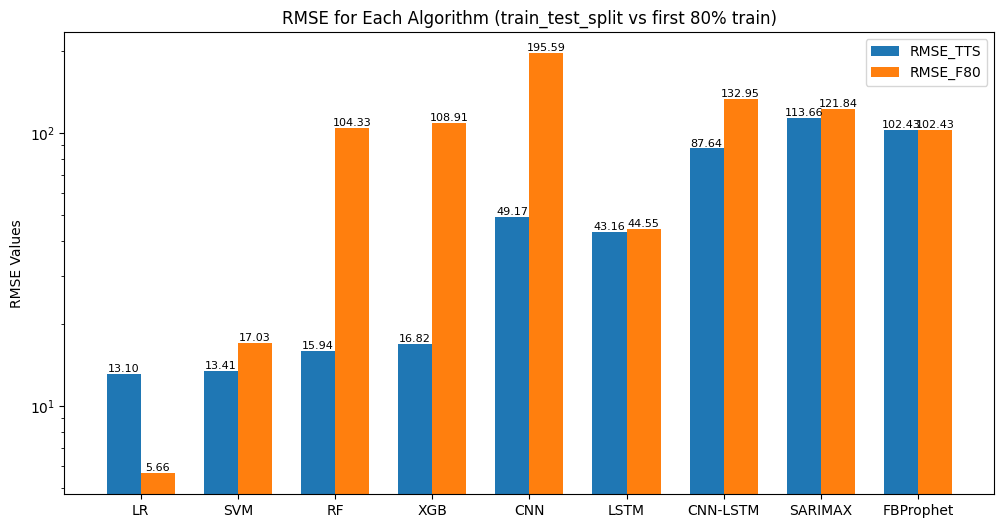

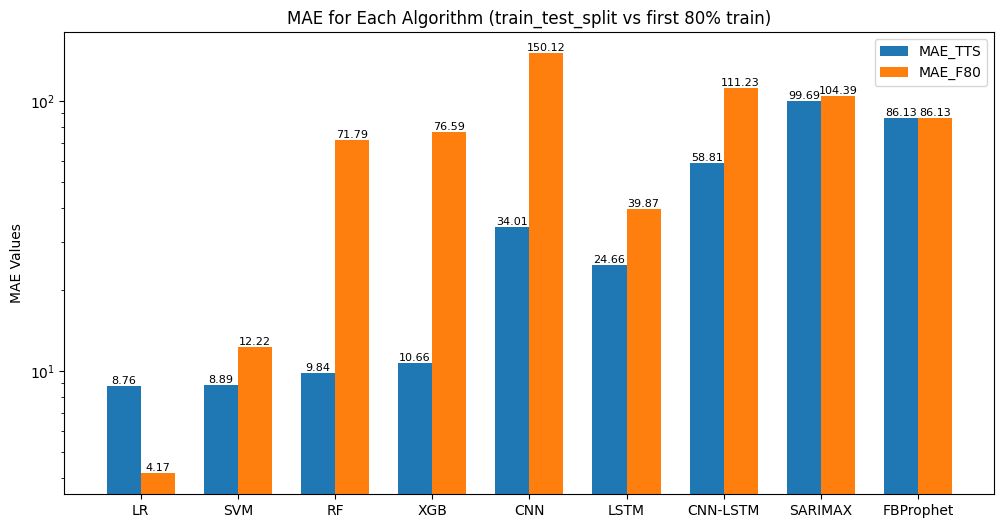

In [7]:
# Plotting individual figures with y-axis adjustment and value annotations
# Set bar width
bar_width = 0.35
x = np.arange(len(algorithms))

# Function to add values on top of bars
def add_values_on_bars(ax, bars):
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom', fontsize=8)

# Figure 1: MSE
fig1, ax1 = plt.subplots(figsize=(12, 6))
bars1 = ax1.bar(x - bar_width/2, mse_tts, bar_width, label='MSE_TTS')
bars2 = ax1.bar(x + bar_width/2, mse_f80, bar_width, label='MSE_F80')
ax1.set_xticks(x)
ax1.set_xticklabels(algorithms)
ax1.set_title('MSE for Each Algorithm (train_test_split vs first 80% train)')
ax1.set_ylabel('MSE Values')
ax1.set_yscale('log')  # Adjust for visibility of smaller values
ax1.legend()
add_values_on_bars(ax1, bars1)
add_values_on_bars(ax1, bars2)
plt.show()

# Figure 2: RMSE
fig2, ax2 = plt.subplots(figsize=(12, 6))
bars1 = ax2.bar(x - bar_width/2, rmse_tts, bar_width, label='RMSE_TTS')
bars2 = ax2.bar(x + bar_width/2, rmse_f80, bar_width, label='RMSE_F80')
ax2.set_xticks(x)
ax2.set_xticklabels(algorithms)
ax2.set_title('RMSE for Each Algorithm (train_test_split vs first 80% train)')
ax2.set_ylabel('RMSE Values')
ax2.set_yscale('log')  # Adjust for visibility of smaller values
ax2.legend()
add_values_on_bars(ax2, bars1)
add_values_on_bars(ax2, bars2)
plt.show()

# Figure 3: MAE
fig3, ax3 = plt.subplots(figsize=(12, 6))
bars1 = ax3.bar(x - bar_width/2, mae_tts, bar_width, label='MAE_TTS')
bars2 = ax3.bar(x + bar_width/2, mae_f80, bar_width, label='MAE_F80')
ax3.set_xticks(x)
ax3.set_xticklabels(algorithms)
ax3.set_title('MAE for Each Algorithm (train_test_split vs first 80% train)')
ax3.set_ylabel('MAE Values')
ax3.set_yscale('log')  # Adjust for visibility of smaller values
ax3.legend()
add_values_on_bars(ax3, bars1)
add_values_on_bars(ax3, bars2)
plt.show()